In [2]:
from sklearn import svm
import numpy as np
import struct
import time

def decode_idx3_ubyte(idx3_ubyte_file,dataset_size):
    f = open(idx3_ubyte_file, 'rb').read()
    mem_offset = 16
    images = []
    for i in range(dataset_size):
        if (i+1) % (dataset_size/100) == 0:
            print('#', end='')
        images.append( np.array(struct.unpack_from('>784B', f, mem_offset)).reshape((28, 28)))
        mem_offset += (784)
    return images
    
def decode_idx1_ubyte(idx1_ubyte_file,dataset_size):
    f = open(idx1_ubyte_file, 'rb').read()
    mem_offset = 8
    labels = []
    for i in range(dataset_size):
        if (i+1) % (dataset_size/100) == 0:
            print('#', end='')
        labels.append( struct.unpack_from('>B', f, mem_offset)[0] )
        mem_offset += 1
    return labels


train_image = decode_idx3_ubyte('train-images.idx3-ubyte',60000)
train_label = decode_idx1_ubyte('train-labels.idx1-ubyte',60000)
print('load train done')
test_image = decode_idx3_ubyte('t10k-images.idx3-ubyte',10000)
test_label = decode_idx1_ubyte('t10k-labels.idx1-ubyte',10000)
print('load test done')



########################################################################################################################################################################################################load train done
########################################################################################################################################################################################################load test done


In [57]:
from sklearn.cluster import MiniBatchKMeans


TRAINIMAGE = np.reshape(np.array(train_image),(60000,28*28))

TESTIMAGE = np.reshape(np.array(test_image),(10000,28*28))
TESTLABEL = np.array(test_label)


kmeans = MiniBatchKMeans(n_clusters=10).fit(TRAINIMAGE)

print('fit done')

fit done


In [58]:

def list2stat(predict_labels,prefix=''):
    r = dict()
    for key in '0123456789':
        r[prefix+key] = [0,0,0,0,0,0,0,0,0,0]

    for i, predict_label in enumerate(predict_labels):
        original_label = TESTLABEL[i]
        r[prefix+str(predict_label)][original_label] += 1
    
    return r
        
        

#print(' original test data distribution', list2stat(test_label))
predict_labels = kmeans.predict(TESTIMAGE)

prefix = 'cluster_'
cluster_stat = list2stat(predict_labels, prefix = prefix)

#print(' cluster data distribution', list2stat(kmeans.labels_, prefix = 'cluster_'))
trans = dict()
for key in cluster_stat.keys():
    referto = np.argmax(np.array(cluster_stat[key]))
    print('{} refer to label {}'.format(key , referto))
    print(cluster_stat[key], sum(cluster_stat[key]))
    trans[key.replace(prefix,'')] = referto

    
_predict_labels = predict_labels.tolist()
for i in range(len(_predict_labels)):
    _predict_labels[i] = trans[str(_predict_labels[i])]



#print(kmeans.cluster_centers_.tolist())
print(TESTLABEL.tolist()[:20])
print(_predict_labels[:20])

afterinfer2_predict_labels_stat = list2stat(_predict_labels)

cluster_0 refer to label 4
[2, 0, 21, 5, 355, 29, 24, 90, 16, 243] 785
cluster_1 refer to label 3
[47, 2, 44, 558, 0, 276, 1, 0, 235, 6] 1169
cluster_2 refer to label 2
[5, 13, 725, 43, 4, 3, 3, 12, 13, 2] 823
cluster_3 refer to label 9
[2, 6, 11, 24, 294, 41, 4, 429, 39, 474] 1324
cluster_4 refer to label 1
[4, 1103, 148, 37, 27, 97, 46, 71, 62, 19] 1614
cluster_5 refer to label 7
[4, 1, 11, 11, 275, 71, 0, 424, 92, 240] 1129
cluster_6 refer to label 8
[49, 7, 30, 318, 1, 334, 46, 0, 490, 8] 1283
cluster_7 refer to label 6
[28, 3, 20, 7, 21, 13, 687, 1, 10, 2] 792
cluster_8 refer to label 0
[499, 0, 20, 6, 1, 15, 12, 0, 10, 10] 573
cluster_9 refer to label 0
[340, 0, 2, 1, 4, 13, 135, 1, 7, 5] 508
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]
[7, 3, 1, 0, 4, 1, 9, 9, 4, 7, 0, 0, 9, 0, 1, 3, 4, 9, 3, 9]


The test data distribution
The clustered data distribution


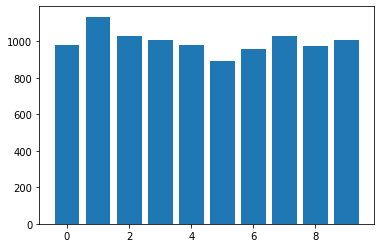

In [65]:
import matplotlib.pyplot as plt

def count_amount_of_label(labels):
    r = [0,0,0,0,0,0,0,0,0,0]
    for x in labels:
        r[x] +=1
    return r


print('The test data distribution')
x = [0,1,2,3,4,5,6,7,8,9]
y = count_amount_of_label(TESTLABEL.tolist())
plt.bar(x, y)



The clustered data distribution


<BarContainer object of 10 artists>

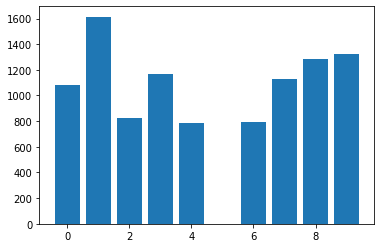

In [66]:
print('The clustered data distribution')
x = [0,1,2,3,4,5,6,7,8,9]
y = count_amount_of_label(_predict_labels)
plt.bar(x, y)


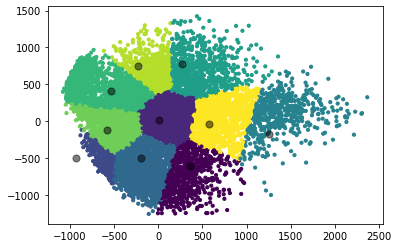

In [75]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
TRAINIMAGE_2D =pca.fit_transform(TRAINIMAGE) 
TESTIMAGE_2D =pca.fit_transform(TESTIMAGE) 
kmeans_2D = KMeans(n_clusters=10).fit(TRAINIMAGE_2D)

predict_labels_2D = kmeans_2D.predict(TESTIMAGE_2D)

plt.scatter(TESTIMAGE_2D[:, 0], TESTIMAGE_2D[:, 1], c=predict_labels_2D, s=10)

centers=pca.fit_transform(kmeans_2D.cluster_centers_) 

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
datas = []

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

for fname in os.listdir('./HW4/pca_dataset'):
    #print(fname)
  
    img = mpimg.imread(os.path.join('./HW4/pca_dataset',fname))     
    #print(img.shape)
    
    
    datas.append(img.reshape(784,))

In [166]:
original_datas = datas.copy()
datas = np.array(datas)
    

print(datas.shape)
print(os.listdir('./HW4/pca_dataset')[0])

(713, 784)
four0.jpg


In [161]:
import numpy as np
from numpy import matlib




class DimensionReduction(object):
    def __init__(self): pass
        
    def PCA(self,data,dim):
        Sigma=self.GetCovarMat(data)
        u, s, vh=np.linalg.svd(Sigma)
        print('u',u.shape)
        print('s',s.shape)
        print('vh',vh.shape)
        #print(s)
        ReduceMat = u[:,:dim]
        LowDimData = np.dot(data, ReduceMat )
        
        return LowDimData, ReduceMat
    
   
    def GetZeroMean(self, data):
        N=np.size(data,0)
        avg=np.average(data)
        self.avg = avg
        data=data-matlib.repmat(avg, N, 1);
        return data 
    
    def GetCovarMat(self, data):
        N=np.size(data,0)
        x=self.GetZeroMean(data)
        Sigma=np.dot(np.transpose(x),x)/N        
        return Sigma


def plot_pca_dim(datas, dim):    
    Q = DimensionReduction()
    LowDimData, ReduceMat= Q.PCA(datas,dim)
    #print('LowDimData',LowDimData.shape)
    #print('ReduceMat',ReduceMat.shape)
    X_approx = np.dot(LowDimData, ReduceMat.T)
    A_approx = X_approx + Q.avg
    GenByLD = A_approx.reshape(713,28,28)
    print(GenByLD.shape)

    plt.imshow(GenByLD[0])
    plt.gray()

    

u (784, 784)
s (784,)
vh (784, 784)
(713, 28, 28)


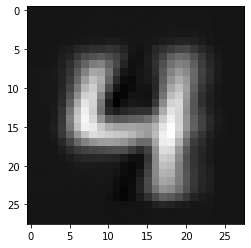

In [162]:
plot_pca_dim(datas,2)

u (784, 784)
s (784,)
vh (784, 784)
(713, 28, 28)


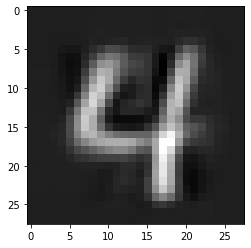

In [163]:

#2, 16, 64, and 256,
plot_pca_dim(datas,16)

u (784, 784)
s (784,)
vh (784, 784)
(713, 28, 28)


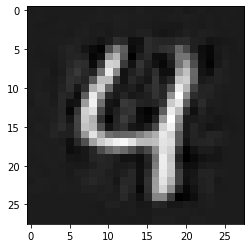

In [164]:
plot_pca_dim(datas,64)

u (784, 784)
s (784,)
vh (784, 784)
(713, 28, 28)


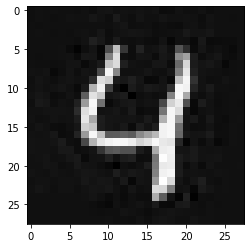

In [165]:
plot_pca_dim(datas,256)

In [ ]:
plot_pca_dim(datas,16)

u (784, 784)
s (784,)
vh (784, 784)


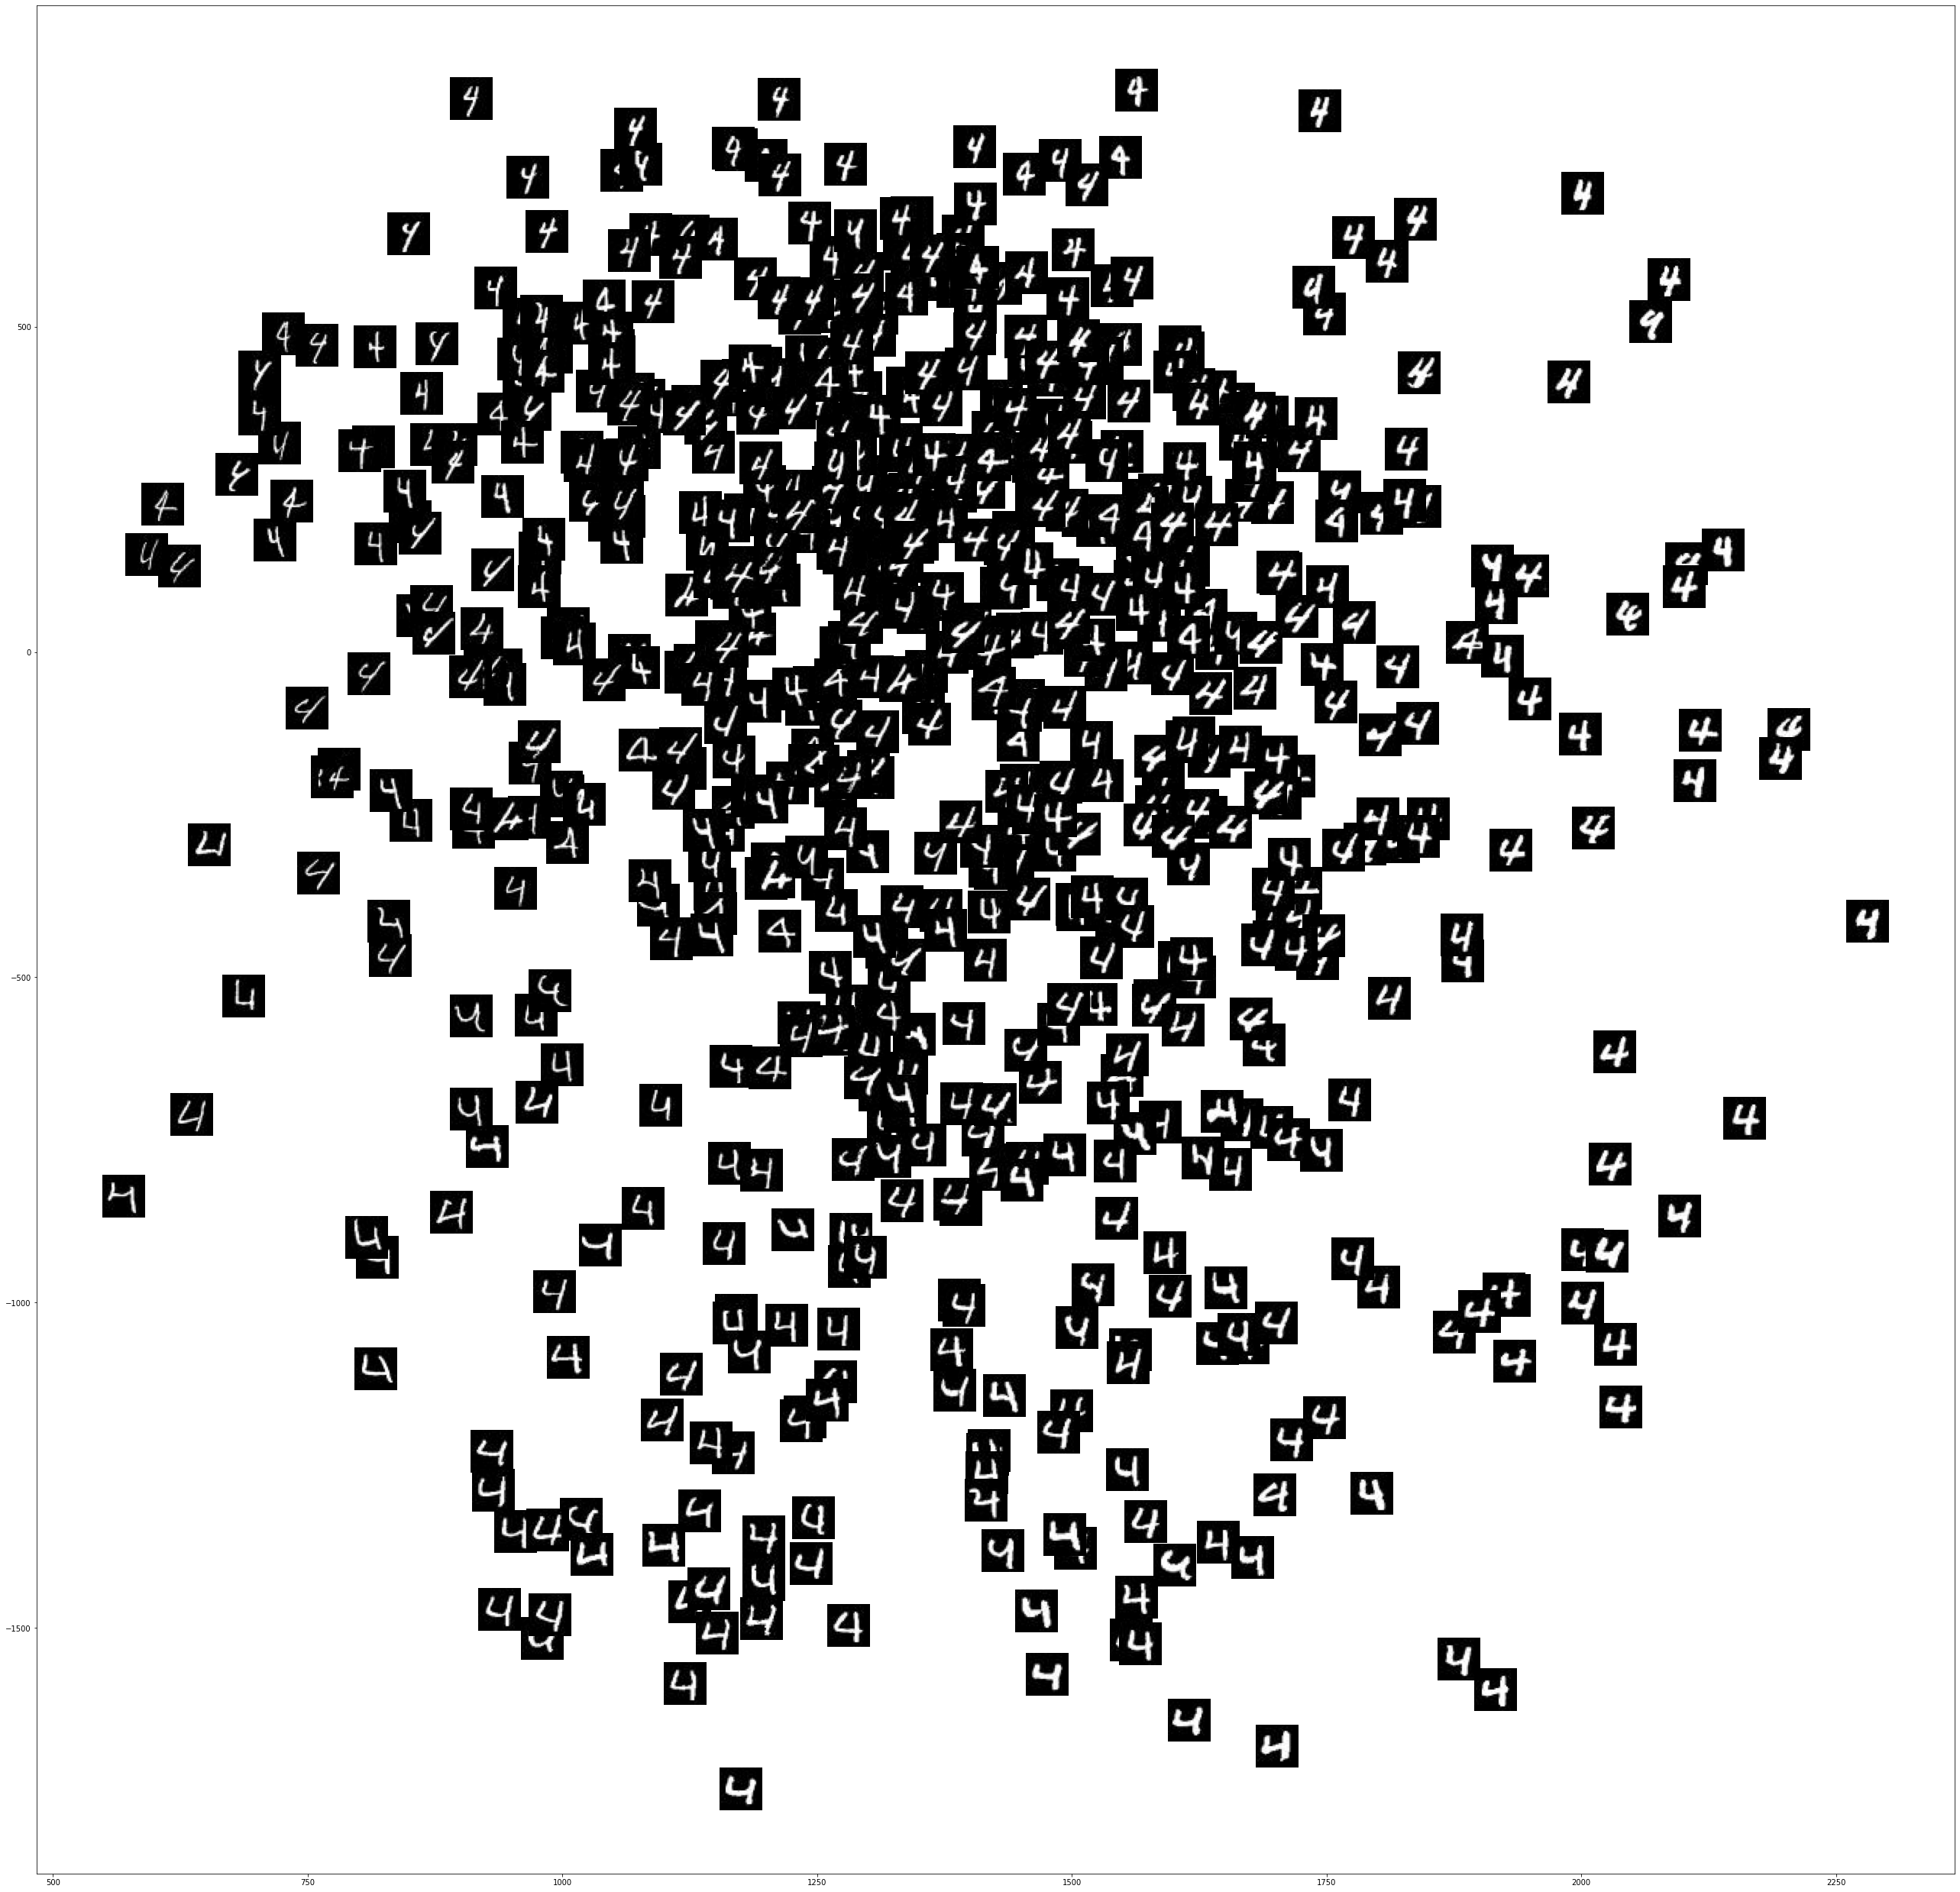

In [173]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def visualize_image_scatter(LowDimData, original_images, figsize=(45,45), image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    for xy, i in zip(LowDimData, original_images):
        ax.add_artist( AnnotationBbox(OffsetImage(i, zoom=image_zoom) , xy , xycoords='data', frameon=False) ) 
    ax.update_datalim(LowDimData)
    ax.autoscale()
    plt.show()
    
LowDimData, ReduceMat= Q.PCA(datas,2)    
visualize_image_scatter(LowDimData, original_images = [np.reshape(i, (28,28)) for i in original_datas], image_zoom=2)